In [1]:
import os
import django
import pandas as pd

# Set up Django environment
os.environ['DJANGO_SETTINGS_MODULE'] = 'backend.settings'
django.setup()

# Import the Customer model
from customers.models import Customer

# Query all customer data and load it into a DataFrame
data = Customer.objects.all().values()
df = pd.DataFrame(data)

# Display the first few rows
df.head()


SynchronousOnlyOperation: You cannot call this from an async context - use a thread or sync_to_async.

In [2]:
import os
import django

# Set up Django environment
os.environ['DJANGO_SETTINGS_MODULE'] = 'backend.settings'
django.setup()


In [3]:
import pandas as pd
from customers.models import Customer

# Query all data and load it into a DataFrame
data = Customer.objects.all().values()
df = pd.DataFrame(data)

# Display the first few rows
df.head()

SynchronousOnlyOperation: You cannot call this from an async context - use a thread or sync_to_async.

In [4]:
import pandas as pd
from customers.models import Customer
from asgiref.sync import sync_to_async
import asyncio

# Wrap the query with sync_to_async and fetch data asynchronously
async def get_customer_data():
    data = await sync_to_async(list)(Customer.objects.all().values())
    return pd.DataFrame(data)

# Run the async function to get the DataFrame
df = asyncio.run(get_customer_data())
df.head()


RuntimeError: asyncio.run() cannot be called from a running event loop

In [5]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

# Then continue with your code
import pandas as pd
from customers.models import Customer

data = Customer.objects.all().values()
df = pd.DataFrame(data)
df.head()


,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached_on_time
0,1,D,Flight,4,2,177.00,3,low,F,44,1233,True
1,2,F,Flight,4,5,216.00,2,low,M,59,3088,True
2,3,A,Flight,2,2,183.00,4,low,M,48,3374,True
3,4,B,Flight,3,3,176.00,4,medium,M,10,1177,True
4,5,C,Flight,2,2,184.00,3,medium,F,46,2484,True


In [6]:
# Descriptive statistics
print("Descriptive statistics:")
print(df.describe())

# Distribution of categorical features
print("\nWarehouse Block Distribution:")
print(df['warehouse_block'].value_counts())

print("\nMode of Shipment Distribution:")
print(df['mode_of_shipment'].value_counts())

print("\nProduct Importance Distribution:")
print(df['product_importance'].value_counts())


Descriptive statistics:
                id  customer_care_calls  customer_rating  prior_purchases  \
count  10999.00000         10999.000000     10999.000000     10999.000000   
mean    5500.00000             4.054459         2.990545         3.567597   
std     3175.28214             1.141490         1.413603         1.522860   
min        1.00000             2.000000         1.000000         2.000000   
25%     2750.50000             3.000000         2.000000         3.000000   
50%     5500.00000             4.000000         3.000000         3.000000   
75%     8249.50000             5.000000         4.000000         4.000000   
max    10999.00000             7.000000         5.000000        10.000000   

       discount_offered  weight_in_gms  
count      10999.000000   10999.000000  
mean          13.373216    3634.016729  
std           16.205527    1635.377251  
min            1.000000    1001.000000  
25%            4.000000    1839.500000  
50%            7.000000    4149.0000

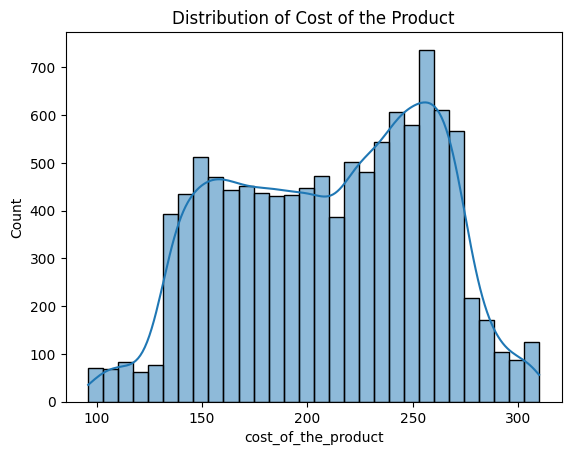

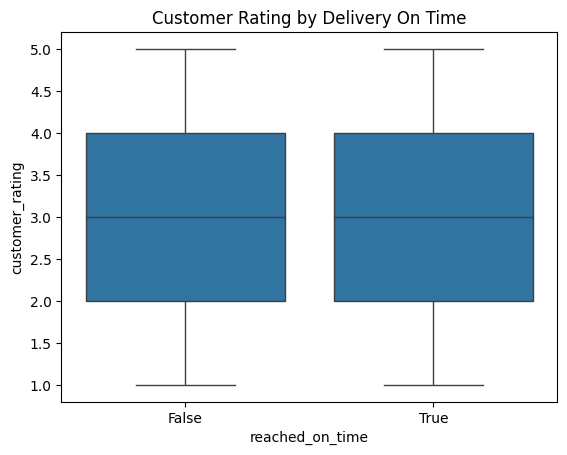

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(df['cost_of_the_product'], kde=True)
plt.title("Distribution of Cost of the Product")
plt.show()

# Rating vs. Reached on Time
sns.boxplot(x='reached_on_time', y='customer_rating', data=df)
plt.title("Customer Rating by Delivery On Time")
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features
features = df[['cost_of_the_product', 'prior_purchases', 'customer_rating', 'discount_offered']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


ModuleNotFoundError: No module named 'sklearn'

In [12]:
from scikit_learn.preprocessing import StandardScaler
from scikit_learn.cluster import KMeans

# Select relevant features
features = df[['cost_of_the_product', 'prior_purchases', 'customer_rating', 'discount_offered']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


ModuleNotFoundError: No module named 'scikit_learn'

In [13]:
from scikit-learn.preprocessing import StandardScaler
from scikit-learn.cluster import KMeans

# Select relevant features
features = df[['cost_of_the_product', 'prior_purchases', 'customer_rating', 'discount_offered']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


SyntaxError: invalid syntax (3208869877.py, line 1)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant features
features = df[['cost_of_the_product', 'prior_purchases', 'customer_rating', 'discount_offered']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [15]:
# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=0)
df['customer_segment'] = kmeans.fit_predict(scaled_features)

# Display cluster assignments
print(df[['customer_segment']].value_counts())


customer_segment
0                   4794
1                   4452
2                   1753
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the feature set and target variable
X = df[['cost_of_the_product', 'prior_purchases', 'customer_rating', 'discount_offered']]
y = df['reached_on_time']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6218181818181818

Classification Report:
              precision    recall  f1-score   support

       False       0.54      0.51      0.53       895
        True       0.68      0.70      0.69      1305

    accuracy                           0.62      2200
   macro avg       0.61      0.60      0.61      2200
weighted avg       0.62      0.62      0.62      2200

